### Top 10 Global Companies stock data projects by Sophie Okhagbuzo

#This dataset provides comprehensive stock market data for some of the world's leading companies, including Apple, Microsoft, Nvidia, Google, Amazon, Saudi Aramco, Meta, Berkshire Hathaway, TSMC, and Eli Lilly. It covers various financial metrics such as opening and closing prices, trading volumes, and market capitalization. 
The data spans across 2024, offering a valuable resource for analyzing market trends and investment strategies. Ideal for financial analysts, researchers, and data enthusiasts, this dataset enables in-depth analysis and forecasting. 
Utilize this data to explore stock performance and uncover market insights.

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import time
import datetime

In [2]:
# Create a Timestamp for your output to track when data was collected

import datetime

today = datetime.date.today()

print(today)

2024-09-12


In [79]:
df=pd.read_excel('Downloads/top_10_stock_data.xlsx')

In [9]:
df

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume
0,1/2/2015,AAPL,27.847500,27.860001,26.837500,27.332500,24.373959,"212,818,400.00"
1,1/5/2015,AAPL,27.072500,27.162500,26.352501,26.562500,23.687313,"257,142,000.00"
2,1/6/2015,AAPL,26.635000,26.857500,26.157499,26.565001,23.689535,"263,188,400.00"
3,1/7/2015,AAPL,26.799999,27.049999,26.674999,26.937500,24.021711,"160,423,600.00"
4,1/8/2015,AAPL,27.307501,28.037500,27.174999,27.972500,24.944679,"237,458,000.00"
...,...,...,...,...,...,...,...,...
25481,8/23/2024,LLY,955.440002,960.500000,943.109985,952.739990,952.739990,"2,063,300.00"
25482,8/26/2024,LLY,949.200012,955.000000,942.770019,950.530029,950.530029,"2,166,000.00"
25483,8/27/2024,LLY,952.500000,972.479981,949.950012,954.479981,954.479981,"2,912,900.00"
25484,8/28/2024,LLY,954.150024,958.340027,943.260010,948.940002,948.940002,"1,701,800.00"


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25486 entries, 0 to 25485
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       25486 non-null  datetime64[ns]
 1   Ticker     25486 non-null  object        
 2   Open       25486 non-null  float64       
 3   High       25486 non-null  float64       
 4   Low        25486 non-null  float64       
 5   Close      25486 non-null  float64       
 6   Adj Close  25486 non-null  float64       
 7    Volume    25486 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 1.6+ MB


In [82]:
df.describe()

,Date,Open,High,Low,Close,Adj Close
count,25486,25486.000000,25486.000000,25486.000000,25486.000000,25486.000000
mean,2019-12-11 14:55:12.689319424,122.880757,124.155843,121.584466,122.910798,120.838984
min,2015-01-02 00:00:00,0.481250,0.487500,0.473500,0.478500,0.459453
25%,2017-07-14 00:00:00,39.992501,40.222501,39.664376,39.950251,38.005300
50%,2020-01-22 00:00:00,91.272247,92.334751,90.328251,91.234249,90.031422
75%,2022-05-10 00:00:00,165.699997,167.208370,164.027500,165.617496,164.885014
max,2024-08-29 00:00:00,956.200012,972.530029,949.950012,954.479981,954.479981
std,NaN,115.447694,116.647929,114.176053,115.447702,115.470334


In [83]:
df.shape

(25486, 8)

In [84]:
df.columns=df.columns.str.lower()

In [85]:
df.head(1)

,date,ticker,open,high,low,close,adj close,volume
0,2015-01-02,AAPL,27.8475,27.860001,26.8375,27.3325,24.373959,212818400


In [86]:
df= df.rename(columns={'adj close':'adj_close',  ' volume ':'volume'})

In [87]:
df

,date,ticker,open,high,low,close,adj_close,volume
0,2015-01-02,AAPL,27.847500,27.860001,26.837500,27.332500,24.373959,212818400
1,2015-01-05,AAPL,27.072500,27.162500,26.352501,26.562500,23.687313,257142000
2,2015-01-06,AAPL,26.635000,26.857500,26.157499,26.565001,23.689535,263188400
3,2015-01-07,AAPL,26.799999,27.049999,26.674999,26.937500,24.021711,160423600
4,2015-01-08,AAPL,27.307501,28.037500,27.174999,27.972500,24.944679,237458000
...,...,...,...,...,...,...,...,...
25481,2024-08-23,LLY,955.440002,960.500000,943.109985,952.739990,952.739990,2063300
25482,2024-08-26,LLY,949.200012,955.000000,942.770019,950.530029,950.530029,2166000
25483,2024-08-27,LLY,952.500000,972.479981,949.950012,954.479981,954.479981,2912900
25484,2024-08-28,LLY,954.150024,958.340027,943.260010,948.940002,948.940002,1701800


In [88]:
# Convert date columns to datetime format
for col in df.columns:
    if 'Date' in col or 'date' in col:
        df[col] = pd.to_datetime(df[col], format="%d/%m/%Y", errors='coerce')

In [89]:
df

,date,ticker,open,high,low,close,adj_close,volume
0,2015-01-02,AAPL,27.847500,27.860001,26.837500,27.332500,24.373959,212818400
1,2015-01-05,AAPL,27.072500,27.162500,26.352501,26.562500,23.687313,257142000
2,2015-01-06,AAPL,26.635000,26.857500,26.157499,26.565001,23.689535,263188400
3,2015-01-07,AAPL,26.799999,27.049999,26.674999,26.937500,24.021711,160423600
4,2015-01-08,AAPL,27.307501,28.037500,27.174999,27.972500,24.944679,237458000
...,...,...,...,...,...,...,...,...
25481,2024-08-23,LLY,955.440002,960.500000,943.109985,952.739990,952.739990,2063300
25482,2024-08-26,LLY,949.200012,955.000000,942.770019,950.530029,950.530029,2166000
25483,2024-08-27,LLY,952.500000,972.479981,949.950012,954.479981,954.479981,2912900
25484,2024-08-28,LLY,954.150024,958.340027,943.260010,948.940002,948.940002,1701800


###### This dataset provides comprehensive stock market data for some of the world's leading companies, including Apple, Microsoft, Nvidia, Google, Amazon, Saudi Aramco, Meta, Berkshire Hathaway, TSMC, and Eli Lilly. It covers various financial metrics such as opening and closing prices, trading volumes, and market capitalization. The data spans across 2024, offering a valuable resource for analyzing market trends and investment strategies.This dataset enables in-depth analysis and forecasting.This data will be used to explore stock performance and uncover market insights.

####### This is a typical financial time-series dataset for stock analysis, where each row represents daily data for the given stock ticker.
The main features (columns) in this dataset are:
Date: The trading date for each record. This is essential for time-series analysis.
Ticker: The stock's unique identifier or symbol (e.g., AAPL for Apple). This helps identify which stock the data refers to in case of multiple stocks.
Open: The price at which the stock opened at the start of the trading day. It provides insights into investor sentiment at market opening.
High: The highest price the stock reached during the trading day. This indicates the peak value of the stock on that day.
Low: The lowest price the stock reached during the trading day. It shows the lowest value the stock touched on that day.
Close: The price at which the stock closed at the end of the trading day. This is one of the most important features, as it's used for assessing the daily performance of the stock.
Adjusted Close (Adj Close): The closing price adjusted for events such as dividends, stock splits, etc. This feature is often used in long-term analyses as it reflects the true value of the stock after adjustments.
Volume: The number of shares traded during the day. This is a measure of market activity and liquidity for the stock on that day.

In [49]:
###### Univariate Exploration

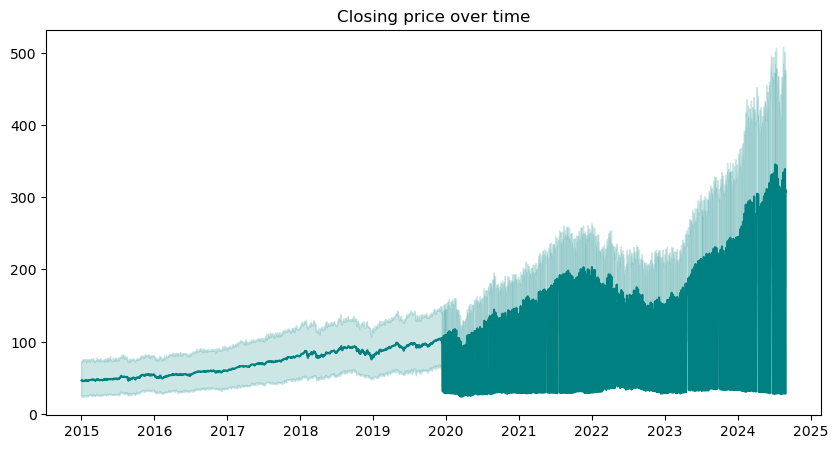

In [124]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x= 'date', y='close',color ='teal',markers=True, dashes=False )
plt.title('Closing price over time')
plt.xlabel(' ')
plt.ylabel('')
plt.show()

In [97]:
df.volume[14633]

' -   '

In [103]:
df['volume'] = df['volume'].replace(' -   ', 0)

In [104]:
df.volume[14633]

0

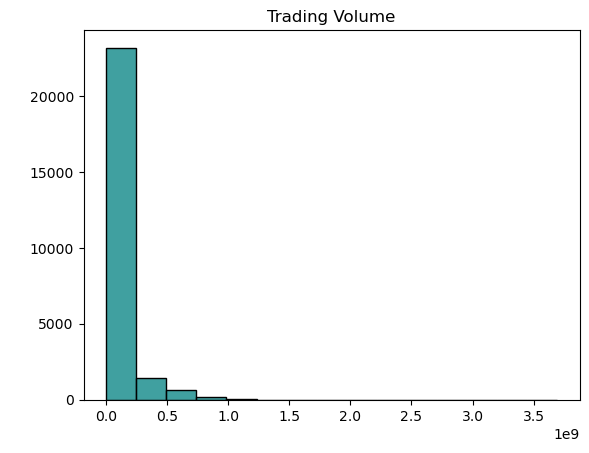

In [125]:
plt.figure()
sns.histplot(df['volume'], bins=15, color ='teal')
plt.title('Trading Volume')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

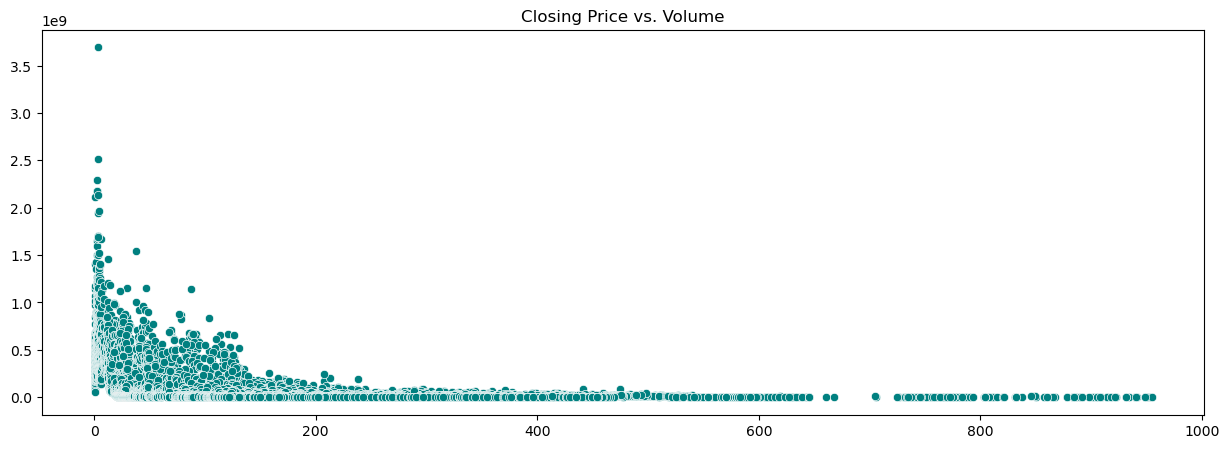

In [106]:
plt.figure(figsize=(15, 5))
sns.scatterplot(data=df, x= 'close', y='volume',color ='teal' )
plt.title('Closing Price vs. Volume')
plt.xlabel(' ')
plt.ylabel('')
plt.show()

In [111]:
### For adjusted closing price

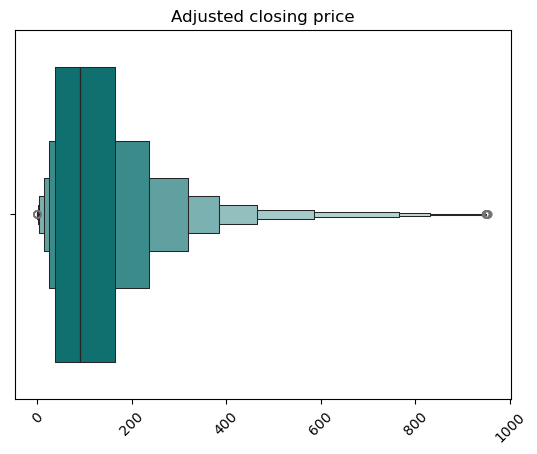

In [115]:
plt.figure()
sns.boxenplot(data=df, x='adj_close', color='teal')
plt.title('Adjusted closing price')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()

In [116]:
## Scatter Plot (Bivariate): Open vs. Close Prices

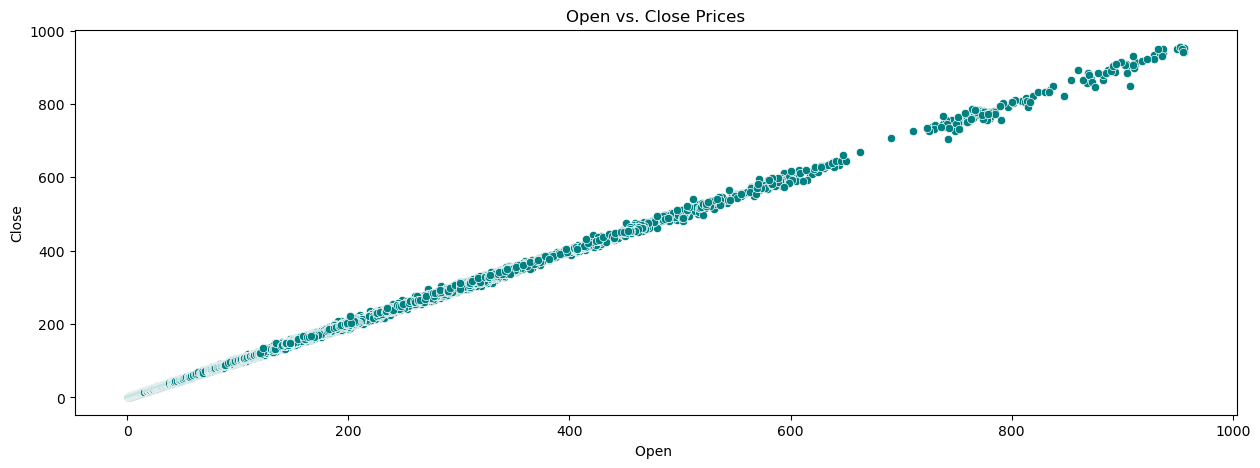

In [118]:
plt.figure(figsize=(15, 5))
sns.scatterplot(data=df, x= 'open', y='close',color ='teal' )
plt.title('Open vs. Close Prices')
plt.xlabel('Open ')
plt.ylabel('Close')
plt.show()

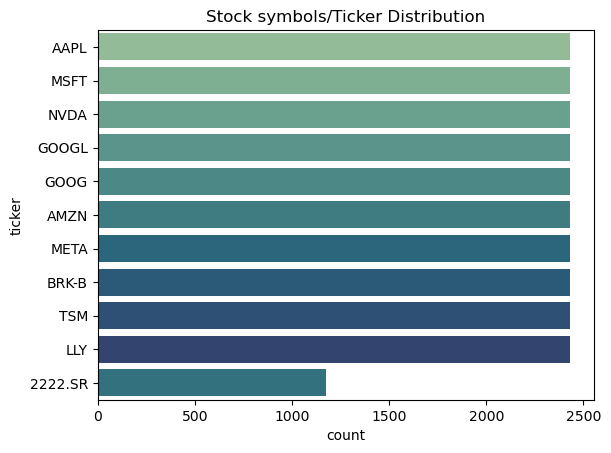

In [141]:
plt.figure()
sns.countplot(data=df, y='ticker', order=df['ticker'].value_counts().index, hue ='ticker', palette ='crest')
plt.title('Stock symbols/Ticker Distribution')
plt.show()

In [119]:
### Correlation Heatmap (Bivariate): For All Numerical Variables

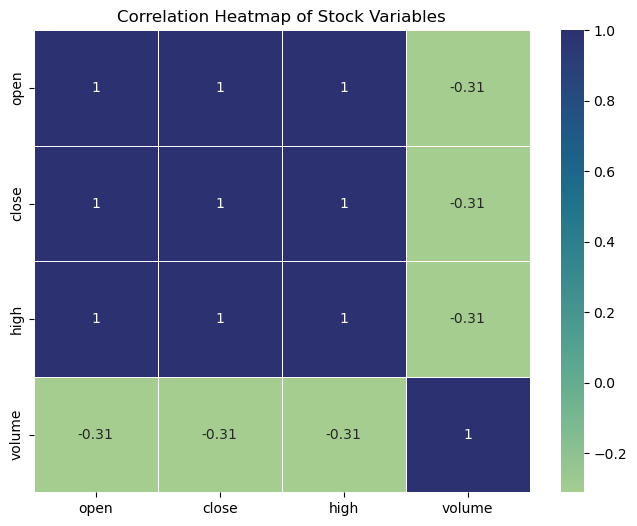

In [130]:
# Select only the necessary columns
selected_columns = df[['open', 'close', 'high', 'volume']]

# Calculate the correlation matrix
corr_matrix = selected_columns.corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='crest', linewidths=0.5)

# Display the plot
plt.title('Correlation Heatmap of Stock Variables')
plt.show()

### #Conclusion
The analysis of stock data for the top global companies yielded several key insights. The closing price trends were central in identifying overall stock performance, while the adjusted close price offered an adjusted view accounting for corporate actions. Volume analysis indicated periods of high trading activity, which often coincided with notable price movements.
The use of a correlation heatmap between variables like open, close, high, and volume revealed strong relationships between price-related variables, while volume showed a more complex relationship with stock prices. The project provided actionable insights into market trends and helped identify patterns in investor behavior across different companies.
This analysis forms the foundation for more advanced forecasting techniques, such as time-series analysis or predictive modeling, to anticipate future stock movements.